In [1]:
import os
from snn_delays.config import CHECKPOINT_PATH
from snn_delays.utils.model_loader import ModelLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from snn_delays.utils.results_utils import get_results, get_states
from snn_delays.utils.visualization_utils import plot_losses

ckpt_dir2 = 'abl8_addtask_st_lrtau01'

sweep_params_names = {
    'U_1': ['rnn','mf', 'rd'],
    'structure':['2l'],
    'tau_m':['ht'],
    'T_freeze_taus':['tt']
    }

from snn_delays.utils.dataset_loader import DatasetLoader

time_window = 50
batch_size = 128 # 128: anil kag
dataset = 'addtask_episodic'

DL = DatasetLoader(dataset=dataset, caching='', num_workers=0, batch_size=batch_size, total_time=time_window)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

attributes = ['train_loss', 'spike_state', 'mem_state']

trn_loss, spikes, mems, preds, refs = get_states(ckpt_dir2, sweep_params_names, attributes, rpts=3, mode='', loader=test_loader, batch_size=batch_size)

Loading model: rd_2l_ht_tt_rpt2

[INFO] Delays: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])

[INFO] Delays o: tensor([0])
None
2000.0
Delta t: 40.0 ms
mean of normal: -1.8545865421311407
Instance of <class 'snn_delays.experimental_models.snn_delay_prun.P_DelaySNN'> loaded successfully


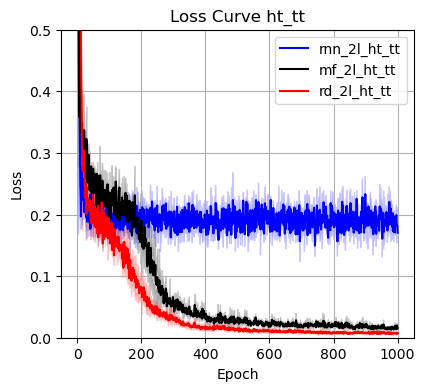

In [2]:
filtered_ht_tt = {key:value for key, value in trn_loss.items() if 'ht_tt' in key}
#filtered_ht_ft = {key:value for key, value in trn_loss.items() if 'ht_ft' in key}

import itertools
colors = itertools.cycle(["blue", "black", 'red'])

ylim = 0.5

plt.figure(figsize=(10,4))
plt.subplot(121)
for key, value in filtered_ht_tt.items():
    plt.title('Loss Curve ht_tt')
    plot_losses(value, label=key, color=next(colors))
    plt.ylim(0, ylim)
# plt.subplot(122)
# for key, value in filtered_ht_ft.items():
#     plt.title('Loss Curve ht_ft')
#     plot_losses(value, label=key, color=next(colors))
#     plt.ylim(0, ylim)

# plot_losses(tstloss_d['f_d_2l_hm_ft'], color='red')

0.012051439
-0.033791207
-0.020454982


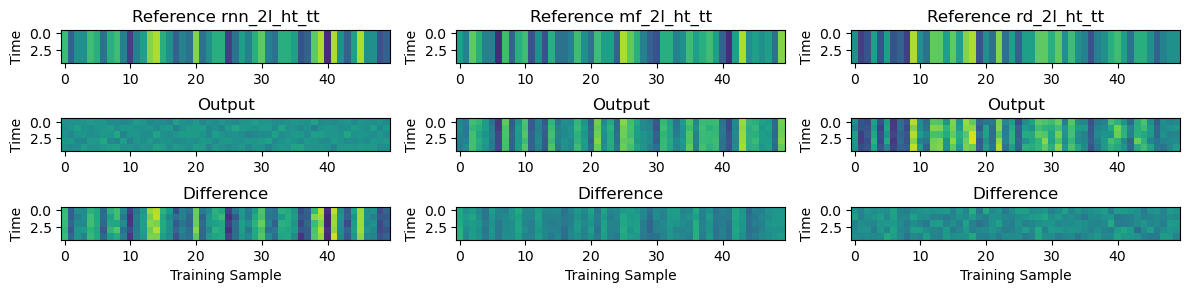

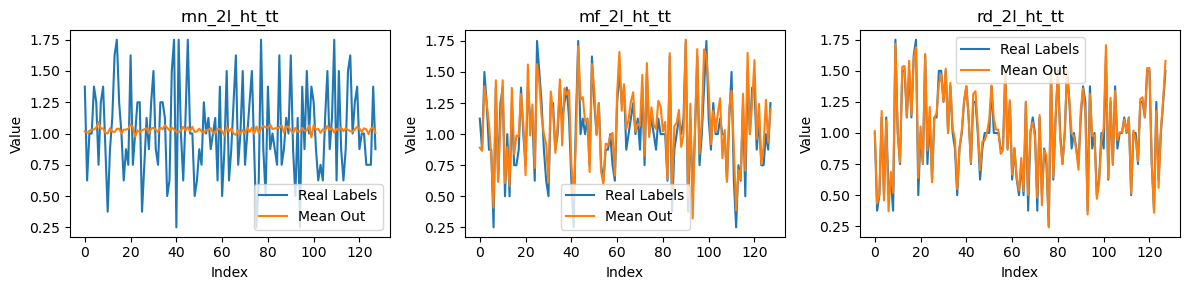

In [3]:
from snn_delays.utils.visualization_utils import plot_add_task, plot_add_task2, plot_add_task3, plot_add_task4

mems_ht_tt = {key:value for key, value in mems.items() if 'ht_tt' in key}

refs_plot1 = {}
outs_plot1 = {}

# Create a figure with 3 rows and N columns (for stacking results horizontally)
fig, axes = plt.subplots(3, 3, figsize=(12, 3))
for i, model_name in enumerate(mems_ht_tt.keys()):
    ref = refs[model_name][0][:,:int(0.1*time_window),0].T.cpu().numpy()
    out = mems[model_name][0]['output'][int(0.9*time_window):].detach().cpu().numpy()    
    plot_add_task(out[:,:50, :], ref[:, :50], axes[:, i], model_name)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,3))
for i, model_name in enumerate(mems_ht_tt.keys()):
    ref = refs[model_name][0]
    out = mems[model_name][0]['output'][int(0.9*time_window):].detach().cpu().numpy()    
    plt.subplot(1,3,i+1)
    plot_add_task2(out, ref)
    plt.title(model_name)
plt.tight_layout()
plt.show()